# Análisis exploratorio de datos (EDA)


En este notebook, nuestro objetivo es realizar un análisis exploratorio de los datos (EDA) de siniestros viales en la Ciudad de Buenos Aires, para poder obtener información relevante y descriptiva sobre el fenómeno estudiado. Este análisis nos permitirá identificar las características, las tendencias, las relaciones y las anomalías de los datos, así como generar visualizaciones que faciliten su comprensión y comunicación. Esto con el fin de generar información que le permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales.


## 0 Configuraciones Globales e Importaciones


En esta sección, importamos todas las bibliotecas y/o módulos necesarios para nuestro EDA y establecemos configuraciones globales de ser requerido.


### Importación de Bibliotecas y/o Módulos


In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme()

print(f"system version: {sys.version}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"Setup Complete")

system version: 3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]
pandas version: 2.1.0
numpy version: 1.25.2
matplotlib version: 3.7.2
seaborn version: 0.12.2
Setup Complete


## 1 Extracción


En esta sección, extraemos los datos del dataset `homicidios_processed.csv` preparados para este fin.


### 1.1 Extracción de los datos


In [2]:
# Ruta al dataset
data_path = '../data/processed/homicidios_processed.csv'

# Cargamos en un DataFrame
df = pd.read_csv(data_path)
df

,id,n_victimas,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado,rol,sexo,edad,fecha_hora,rango_edad,encrucijada
0,2016-0001,1,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,2016-01-01 04:00:00,18-29,True
1,2016-0002,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0,2016-01-02 01:15:00,65+,True
2,2016-0003,1,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,2016-01-03 07:00:00,30-44,False
3,2016-0004,1,AVENIDA,8,-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18.0,2016-01-10 00:00:00,18-29,True
4,2016-0005,1,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29.0,2016-01-21 05:20:00,18-29,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,AVENIDA,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,2021-12-13 17:10:00,18-29,True
713,2021-0094,1,AUTOPISTA,9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,2021-12-20 01:10:00,30-44,True
714,2021-0095,1,AVENIDA,11,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27.0,2021-12-30 00:43:00,18-29,True
715,2021-0096,1,AVENIDA,9,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60.0,2021-12-15 10:30:00,45-64,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             717 non-null    object 
 1   n_victimas     717 non-null    int64  
 2   tipo_de_calle  717 non-null    object 
 3   comuna         717 non-null    int64  
 4   longitud       717 non-null    float64
 5   latitud        717 non-null    float64
 6   participantes  717 non-null    object 
 7   victima        717 non-null    object 
 8   acusado        717 non-null    object 
 9   rol            717 non-null    object 
 10  sexo           717 non-null    object 
 11  edad           717 non-null    object 
 12  fecha_hora     717 non-null    object 
 13  rango_edad     717 non-null    object 
 14  encrucijada    717 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(10)
memory usage: 79.3+ KB


## 2 EDA

### 2.1 Histórico de Víctimas Fatales

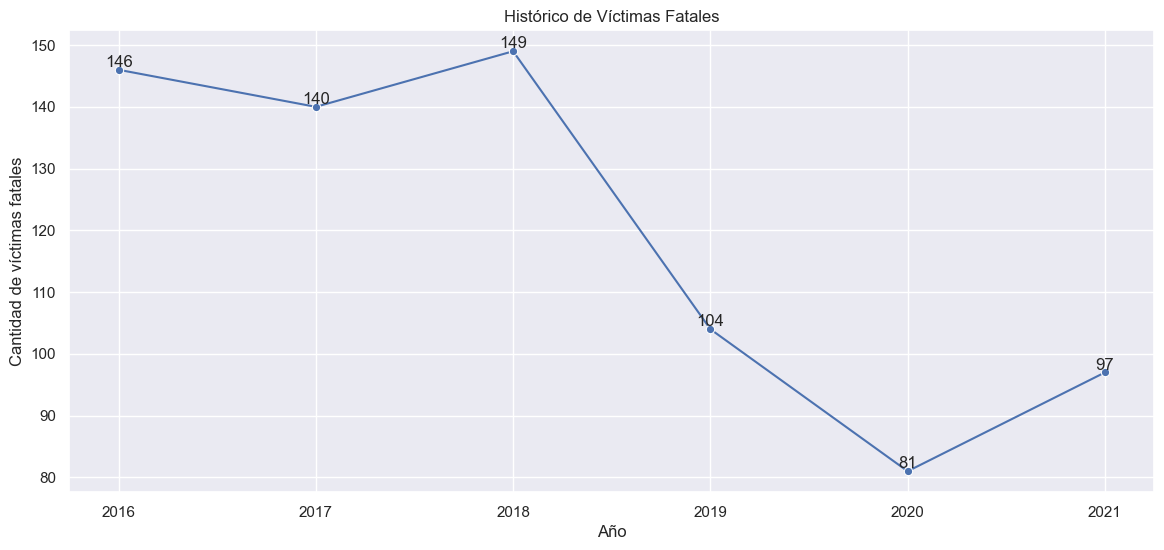

In [4]:
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'])
años = df.fecha_hora.dt.year.value_counts()

plt.figure(figsize=(14, 6))
ax = sns.lineplot(años, marker="o")
for x, y in zip(años.index, años.values):
    ax.text(x, y, y, ha='center', va='bottom')

plt.xlabel('Año')
plt.ylabel('Cantidad de víctimas fatales')
plt.title('Histórico de Víctimas Fatales')
plt.show()

En 2021, hubo un aumento de los siniestros viales con víctimas fatales respecto al año 2020. En 2021 ocurrieron 97 siniestros viales con víctimas fatales este número es superior al registrado en 2020, cuando hubo 81 siniestros, pero menor al registrado en 2019, cuando hubo 104.

Este aumento de los siniestros viales puede interpretarse por un lado, como un efecto del paulatino aumento de la circulación post pandemia. En 2020, la circulación vehicular se redujo drásticamente debido a las restricciones sanitarias impuestas por la pandemia de COVID-19. Sin embargo, en 2021, la circulación vehicular comenzó a recuperarse, lo que podría haber contribuido al aumento de los siniestros viales.

Sin embargo, el número de siniestros fatales en 2021 aún se encuentra por debajo del nivel de 2019, año pre pandémico. 

### 2.2 Siniestros viales según mes de ocurrencia.

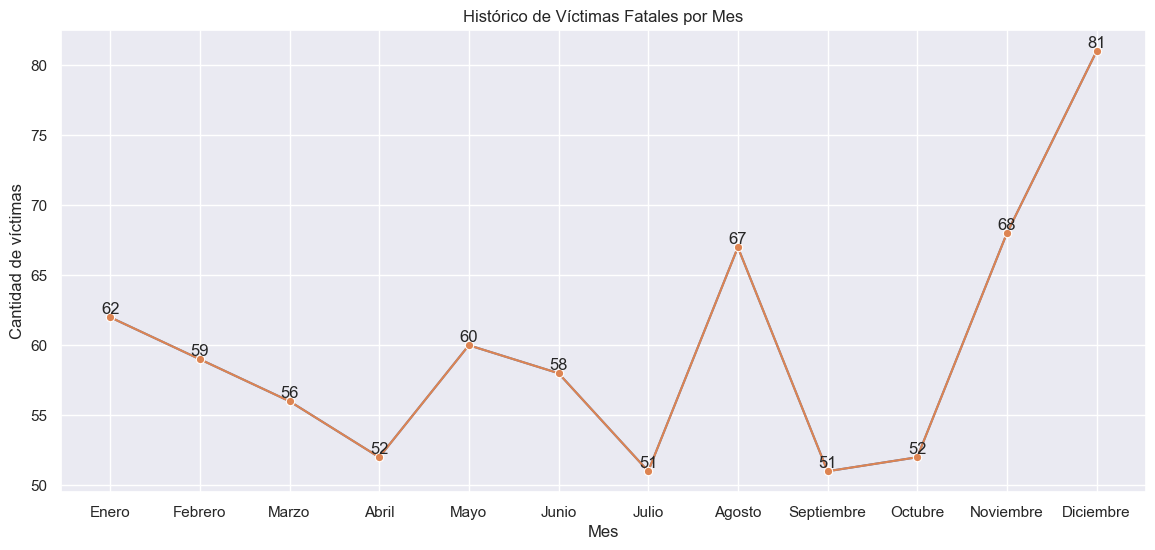

In [5]:
meses = df.fecha_hora.dt.month.value_counts()

plt.figure(figsize=(14, 6))
ax = sns.lineplot(df.fecha_hora.dt.month.value_counts(), marker="o")
ax = sns.lineplot(meses, marker="o")
for x, y in zip(meses.index, meses.values):
    ax.text(x, y, y, ha='center', va='bottom')

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.xlabel('Mes')
plt.xticks(list(range(1, 12 + 1)), meses)
plt.ylabel('Cantidad de víctimas')
plt.title('Histórico de Víctimas Fatales por Mes')
plt.show()

Podemos observar que el número de víctimas fatales en diciembre es significativamente mayor que en cualquier otro mes, con 81 (11%) víctimas fatales. Esto podría deberse a factores como el aumento del tráfico, el consumo de alcohol, las condiciones climáticas o la falta de precaución.

### 2.3 Siniestros viales según día de ocurrencia.

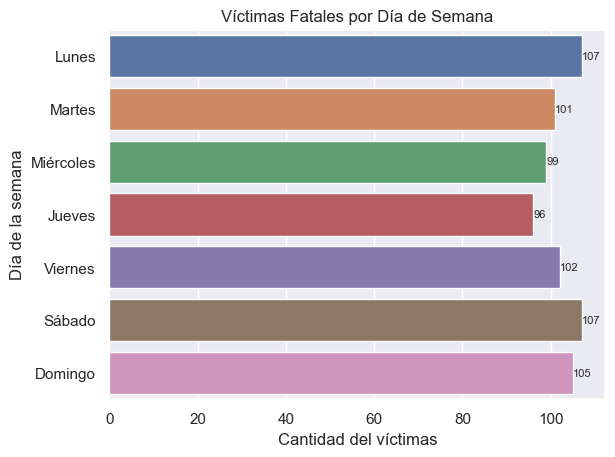

In [6]:
ax = sns.countplot(df, y=df.fecha_hora.dt.dayofweek)

ax.bar_label(ax.containers[0], fontsize=8)

plt.title('Víctimas Fatales por Día de Semana')
plt.xlabel('Cantidad del víctimas')
plt.ylabel('Día de la semana')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Lunes', 'Martes',
           'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.show()

Los días sábados ocurrieron 107 (14.92%) siniestros viales con victimas fatales en el periodo 2016-2021, lo mismo sucede con los dias lunes 107 (14.92%), seguido de los días domingo con 105 (14.64%) y los días viernes con 102 (14.23%).

Se debe resaltar que los fines de semana del periodo, son los que tuvieron mayor cantidad de siniestros viales.

### 2.4 Siniestros viales según hora de ocurrencia.

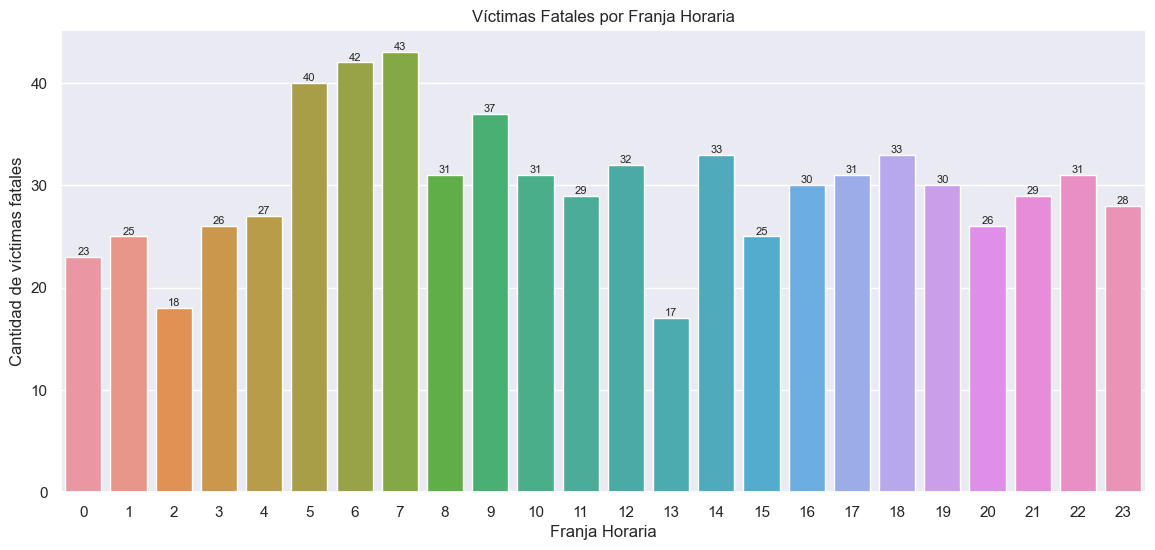

In [7]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(df, x=df.fecha_hora.dt.hour)

ax.bar_label(ax.containers[0], fontsize=8)

plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de víctimas fatales')
plt.title('Víctimas Fatales por Franja Horaria')
plt.show()

En cuanto a los horarios de los siniestros, se puede apreciar que entre las 5:00 – 7:59 horas se registran la mayor cantidad de siniestrabilidad con 125 siniestros viales, asimismo, entre las 16:00 – 19:59 horas se registran 124, siendo los horarios con mayor incidencia de siniestros viales en el periodo 2016-2021.


### 2.5 Víctimas fatales según tipo de vehículo

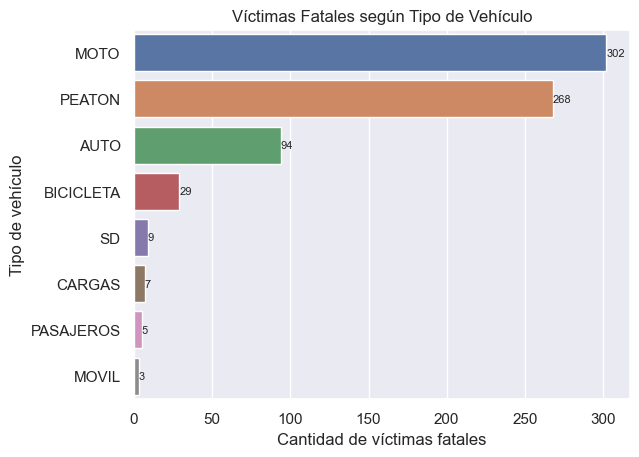

In [8]:
ax = sns.countplot(df, y="victima", order=df.victima.value_counts().index)

ax.bar_label(ax.containers[0], fontsize=8)


plt.ylabel('Tipo de vehículo')
plt.xlabel('Cantidad de víctimas fatales')
plt.title('Víctimas Fatales según Tipo de Vehículo')
plt.show()

Con respecto a los principales tipos de vehículos involucrados en los siniestros viales con víctimas fatales, durante el periodo 2016-2021 se observa que 6 de cada 10 víctimas fatales son usuarios del tipo de vehículo MOTO con 302 (60%) víctimas fatales, le sigue PEATON con 268 (37%), AUTO con 94 (13%) y BICICLETA con 29 (4%) del total de victimas fatales involucradas en siniestros viales.

Asimismo, los tipos de vehículos involucrados en siniestros viales que no han podido ser identificadas (SD) son 9, representando el 1% del total de siniestros viales.

### 2.6 Tipo de vehiculo por Acusado

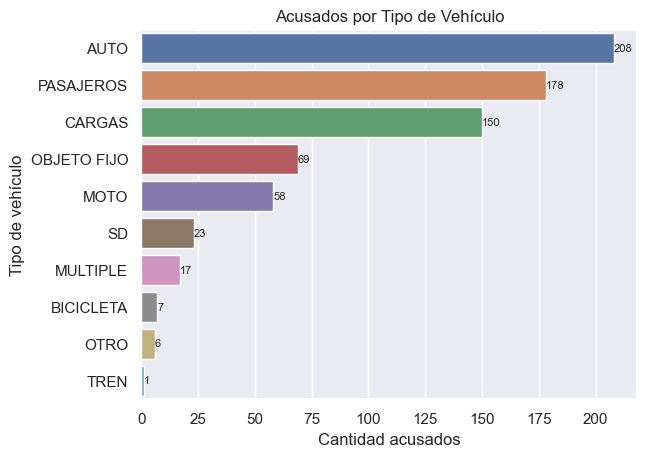

In [9]:
ax = sns.countplot(df, y="acusado", order=df.acusado.value_counts().index)

ax.bar_label(ax.containers[0], fontsize=8)


plt.ylabel('Tipo de vehículo')
plt.xlabel('Cantidad acusados')
plt.title('Acusados por Tipo de Vehículo')
plt.show()

Con respescto al tipo de vehículo que ocupaba quien resultó acusado/a del hecho, podemos observar que AUTO representa el 29% con una participacion en siniestros viales de 208, seguido de PASAJEROS con 178 (25%), CARGAS con 150 (21%), OBJETO FIJO con 69 (10%) y MOTO con 58 (8%).

Cabe recalcar que si bien el tipo de vehiculo MOTO tiene una siniestralidad alta no incurre o resulta en una frecuencia alta como acusado/a del hecho.

### 2.7 Víctimas fatales según edad.

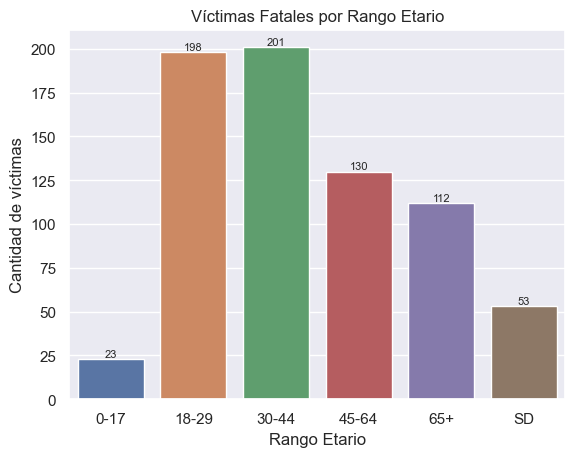

In [10]:
ax = sns.countplot(df, x="rango_edad", order=[
                    '0-17', '18-29', '30-44', '45-64', '65+', 'SD'])
ax.bar_label(ax.containers[0], fontsize=8)

plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de víctimas')
plt.title('Víctimas Fatales por Rango Etario')
plt.show()

Observarmos que hay una diferencia muy marcada en cuanto al perfil de la victima con respecto el rango etario al que pertenece pues se evidencia una mayor presencia de victimas fatales en el rango etario de 18 a 44 años con 399 (57%) víctimas fatales.

### 2.8 Siniestros viales según sexo de la víctima.

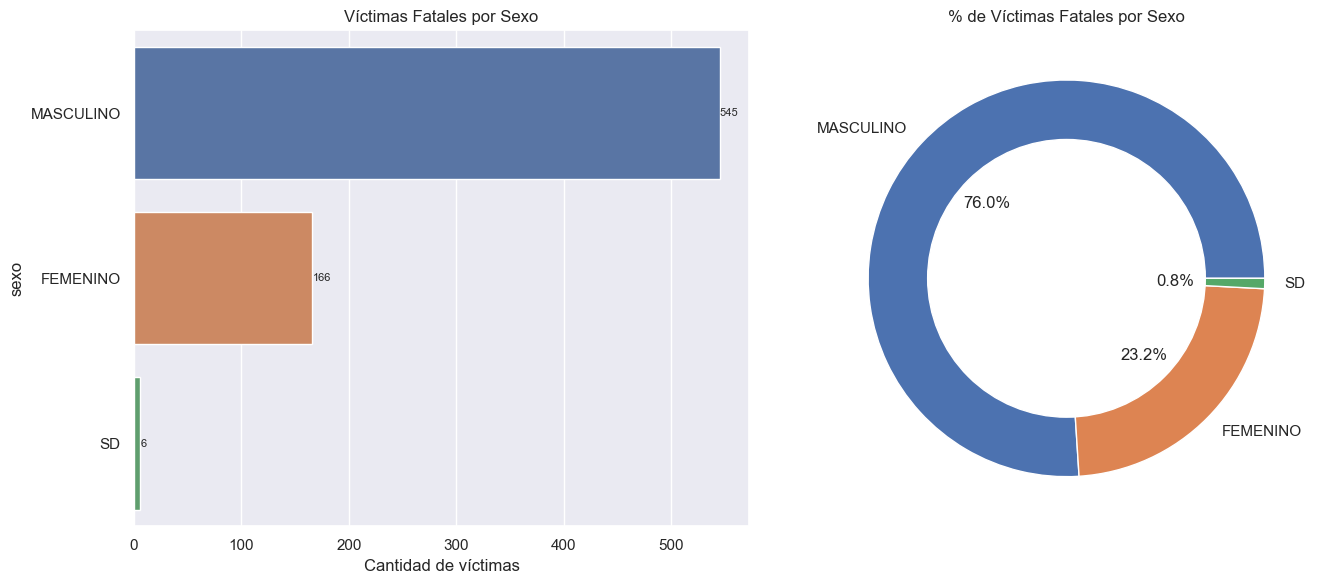

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, y="sexo", ax=ax[0])
ax[0].bar_label(ax[0].containers[0], fontsize=8)
ax[0].set_xlabel('Cantidad de víctimas')
ax[0].set_title('Víctimas Fatales por Sexo')

sexo = df.sexo.value_counts()
my_circle = plt.Circle((0,0), 0.7, color='white')
ax[1].pie(sexo, labels=sexo.index, autopct='%1.1f%%', pctdistance=0.55)
ax[1].add_artist(my_circle)
ax[1].set_title('% de Víctimas Fatales por Sexo')

plt.tight_layout()
plt.show()

Notamos una diferencia bastante marcada en el sexo de la víctima donde casi 8 de cada 10 son de sexo masculino con 545 víctimas en total. Más de tres cuartas partes de las víctimas fatales fueron de sexo masculino (76%).

### 2.9 Víctimas Fatales por Sexo y Rango Etario

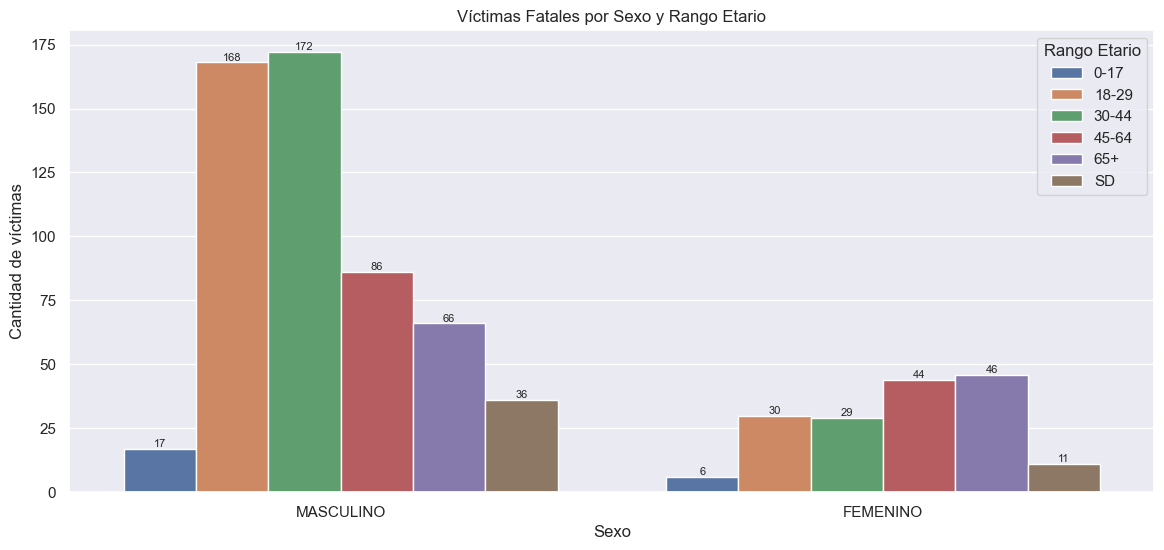

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))
orden = ['0-17', '18-29', '30-44', '45-64', '65+', 'SD']

sns.countplot(x="sexo", hue="rango_edad",
                data=df[df['sexo'] != 'SD'], hue_order=orden, ax=ax)

for bars in ax.containers:
    ax.bar_label(bars, fontsize=8)

ax.set_xlabel('Sexo')
ax.set_ylabel('Cantidad de víctimas')
ax.set_title('Víctimas Fatales por Sexo y Rango Etario')
ax.legend(title="Rango Etario")
plt.show()

En el rango etario una vez mas podemos evidenciar el contraste entre el sexo de las víctimas y la preponderancia de víctimas jovenes masculinas concentrandose la mayor cantidad de ellas en el rango etario de 18 a 45 años. Por otro lado, si bien el número de víctimas femeninas es mucho menor en proporción con las víctimas masculinas, concentra mas víctimas en los rangos etarios de edades mas avanzadas.   

### 2.10 Siniestros viales según tipo de vía

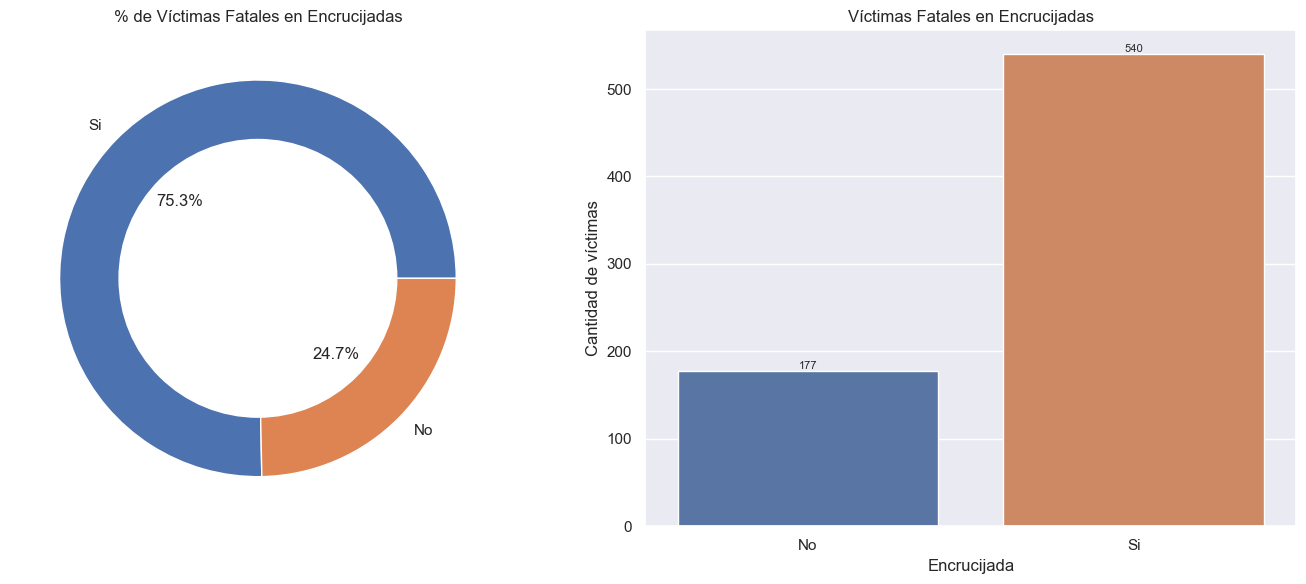

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

encrucijada = df.encrucijada.value_counts()
my_circle = plt.Circle((0,0), 0.7, color='white')
ax[0].pie(encrucijada, labels=['Si', 'No'], autopct='%1.1f%%', pctdistance=0.55)
ax[0].add_artist(my_circle)
ax[0].set_title('% de Víctimas Fatales en Encrucijadas')

sns.countplot(data=df, x="encrucijada", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fontsize=8)
ax[1].set_xlabel('Encrucijada')
ax[1].set_xticklabels(['No', 'Si'])
ax[1].set_ylabel('Cantidad de víctimas')
ax[1].set_title('Víctimas Fatales en Encrucijadas')

plt.tight_layout()
plt.show()

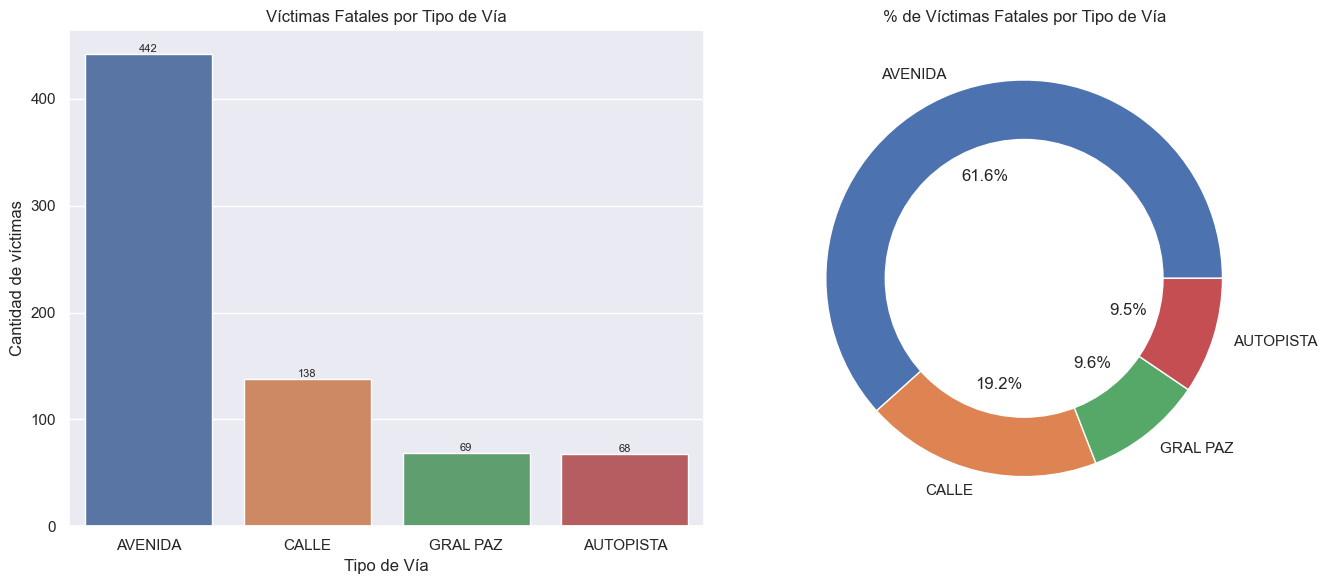

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, x="tipo_de_calle", ax=ax[0],order=df.tipo_de_calle.value_counts().index)
ax[0].bar_label(ax[0].containers[0], fontsize=8)
ax[0].set_xlabel('Tipo de Vía')
ax[0].set_ylabel('Cantidad de víctimas')
ax[0].set_title('Víctimas Fatales por Tipo de Vía')

vias = df.tipo_de_calle.value_counts()
my_circle = plt.Circle((0, 0), 0.7, color='white')
ax[1].pie(vias, labels=vias.index, autopct='%1.1f%%', pctdistance=0.55)
ax[1].add_artist(my_circle)
ax[1].set_title('% de Víctimas Fatales por Tipo de Vía')

plt.tight_layout()
plt.show()

Se observa que la mayor cantidad de siniestros viales con víctimas fatales ocurren en las avenidas con 442 (62%) y particularmente en encrucijadas con 540 (75%) lo que quiere decir que 7 de cada 10 siniestros ocurre en un cruce de calles.

### 2.11 Densidad de víctimas fatales por edad y tipo de vehículo

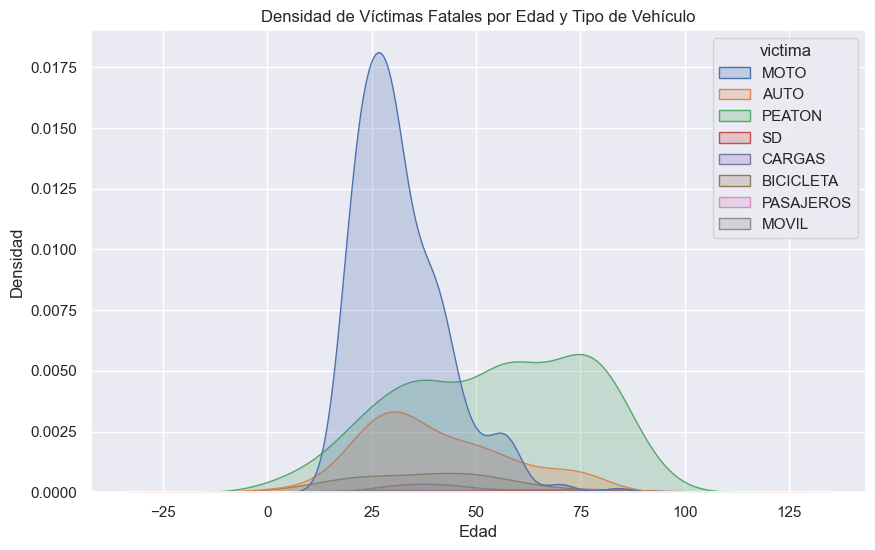

In [15]:
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

# Crea el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='edad', hue='victima', fill=True)
plt.title('Densidad de Víctimas Fatales por Edad y Tipo de Vehículo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()


Este gráfico de densidad nos permite observar cuál es el tipo de vehículo con mayor presencia entre las víctimas fatales. La moto es el tipo de vehículo con un pico más elevado, en segundo lugar se encuentra los peatones, la curva de densidad es menos empinada pero abarca un rango etario más extenso. Por otro lado se encuentran el auto y la bicicleta, los cuales no presentan picos elevados pero su composición etaria abarca una base etaria mucho más extensa. 

### 2.12 Distribución de edades según tipo de vehículo.

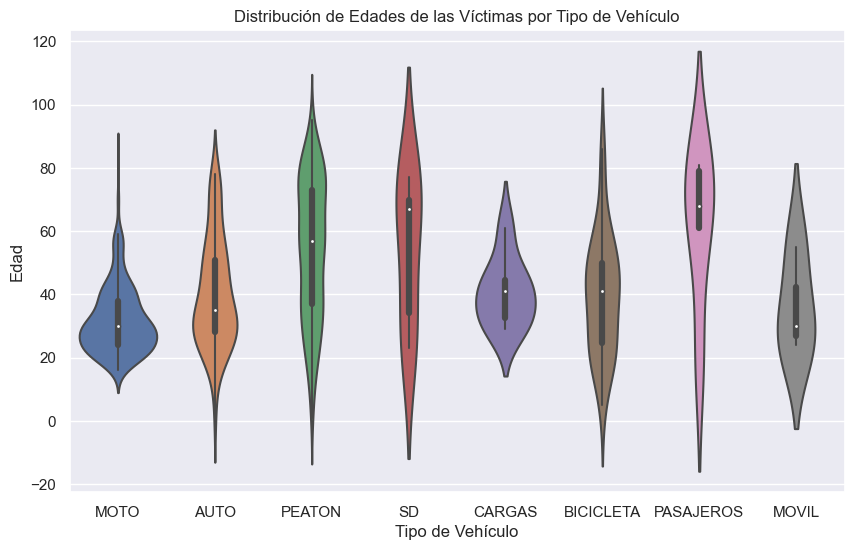

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='victima', y='edad')
plt.title('Distribución de Edades de las Víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Edad')
plt.show()


Con este gráfico podemos reafirmar los observado anteriormente. Existe una gran dispersión de edades de víctimas fallecidas según el vehículo que ocupaban al momento del hecho. La distribución de edades de las víctimas peatones es la más dispersa, con víctimas de todas las edades,. La distribución de edades de las víctimas pasajeros es más concentrada en las edades adultas, mientras que las victimas mas jovenes se concentran en motocicletas.

### 2.13 Víctimas fatales por rol

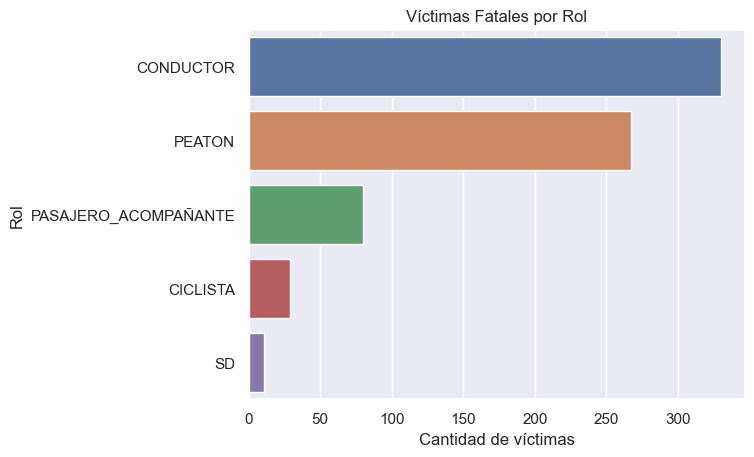

In [17]:
sns.countplot(df, y='rol', order=df.rol.value_counts().index)
plt.ylabel('Rol')
plt.xlabel('Cantidad de víctimas')
plt.title('Víctimas Fatales por Rol')
plt.show()


Destaca que los pasajeros y peatones son las víctimas más comunes. Representan la mayoría de las víctimas fatales. Esto podría indicar que estos grupos están particularmente en riesgo y podrían beneficiarse de medidas de seguridad adicionales.

Los ciclistas son las víctimas menos comunes. Representan el menor número de víctimas fatales. Esto podría sugerir que estos grupos están menos en riesgo, o simplemente que hay menos ciclistas en las vias.

Los conductores representan una proporción significativa de las víctimas. Aunque los conductores no son el grupo más grande de víctimas, representan una proporción significativa de las víctimas fatales. Esto subraya la importancia de la seguridad del conductor en la prevención de siniestros.

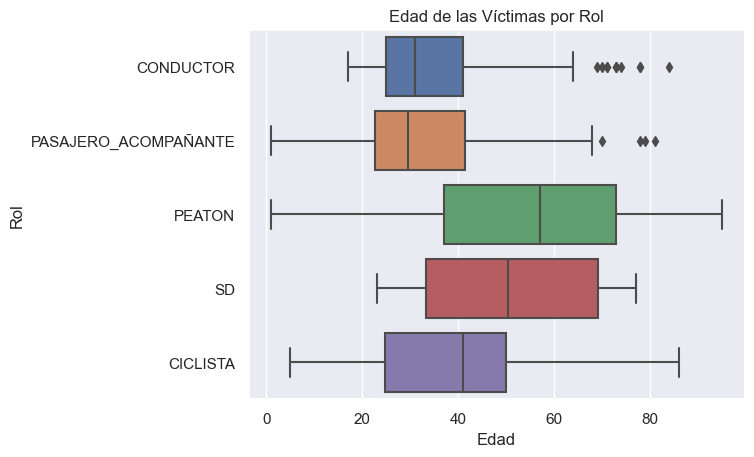

In [18]:
sns.boxplot(data=df, y='rol', x='edad')
plt.ylabel('Rol')
plt.xlabel('Edad')
plt.title('Edad de las Víctimas por Rol')
plt.show()


En el análisis de los cuatro roles considerados, se observa que la edad promedio de los conductores de automóviles y de los pasajeros acompañantes es similar, alrededor de los 35 años. La edad mínima para los conductores es de aproximadamente 18 años, pero en los otros roles, se pueden encontrar víctimas más jóvenes, lo que podría indicar la presencia de niños siendo transportados.

Para los peatones, hay una mayor variabilidad en las edades, que van desde niños muy pequeños hasta adultos mayores de cerca de 90 años.

Aunque se observan algunos valores atípicos en los roles de conductor y pasajero acompañante, estas edades son posibles y se consideran casos especiales dentro del conjunto de datos

## 3 KPIs


Se proponen 2 KPIs para medir y graficar. A continuación, se describen los KPIs propuestos:


### 3.1 KPI 1


- _Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior_.

  Definimos a la **tasa de homicidios en siniestros viales** como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico.
  Su fórmula es:

  $\text{Tasa de homicidios en siniestros viales} = \frac{\text{Número de homicidios en siniestros viales}}{\text{Población total}}\times 100,000$


Para medir y graficar el primer KPI propuesto procedemos de la siguiente forma:


In [19]:
df_homicidios = df.copy()

# Obtenemos el año y el semestre
df_homicidios['año'] = df_homicidios['fecha_hora'].dt.year
df_homicidios['semestre'] = np.ceil(
    df_homicidios['fecha_hora'].dt.month / 6).astype(int)

# Agrupamos por año y semestre, contando el número de homicidios
homicidios_por_semestre = df_homicidios.groupby(['año', 'semestre']).size()
kpi_1_df = homicidios_por_semestre.to_frame(name='homicidios')
kpi_1_df

homicidios
año  semestre            
2016 1                 65
     2                 81
2017 1                 69
     2                 71
2018 1                 70
     2                 79
2019 1                 57
     2                 47
2020 1                 31
     2                 50
2021 1                 55
     2                 42

Según diversas [fuentes consultadas](#4-referencias) la poblacion total estimada de CABA para el año 2021 es de 3.120.612 habitantes.


In [20]:
# Población total estimada de CABA para 2021
poblacion_total = 3120612

# Calculamos la tasa de homicidios en siniestros viales por semestre
tasa_homicidios = homicidios_por_semestre / poblacion_total * 100000
tasa_homicidios.to_frame(name='tasa_homicidios')

tasa_homicidios
año  semestre                 
2016 1                2.082925
     2                2.595645
2017 1                2.211105
     2                2.275195
2018 1                2.243150
     2                2.531555
2019 1                1.826565
     2                1.506115
2020 1                0.993395
     2                1.602250
2021 1                1.762475
     2                1.345890

- Para calcular el cambio porcentual entre estos dos años, podemos usar la fórmula:
  $$\text{Cambio porcentual} = \frac{\text{Valor final} - \text{Valor inicial}}{\text{Valor inicial}} \times 100$$


In [21]:
# Calculamos el cambio porcentual para los semetres 2021-S1 y 2021-S2
kpi = round(
    (tasa_homicidios.iloc[-2] - tasa_homicidios.iloc[-1]) / tasa_homicidios.iloc[-2] * 100, 2)
print(f'El cambio porcentual es de: {kpi}%')

El cambio porcentual es de: 23.64%


- Sustituyendo los valores correspondientes obtenemos:

$$\text{Cambio porcentual} = \frac{1.76 - 1.34}{1.76} \times 100 \approx 23.64\%$$


Observamos que en el último semestre analizado se cumple con el KPI, ya que disminuyó en un 23% la tasa de homicidios respecto al semestre anterior.


- Graficamos la tasa de homicidios por semestre:


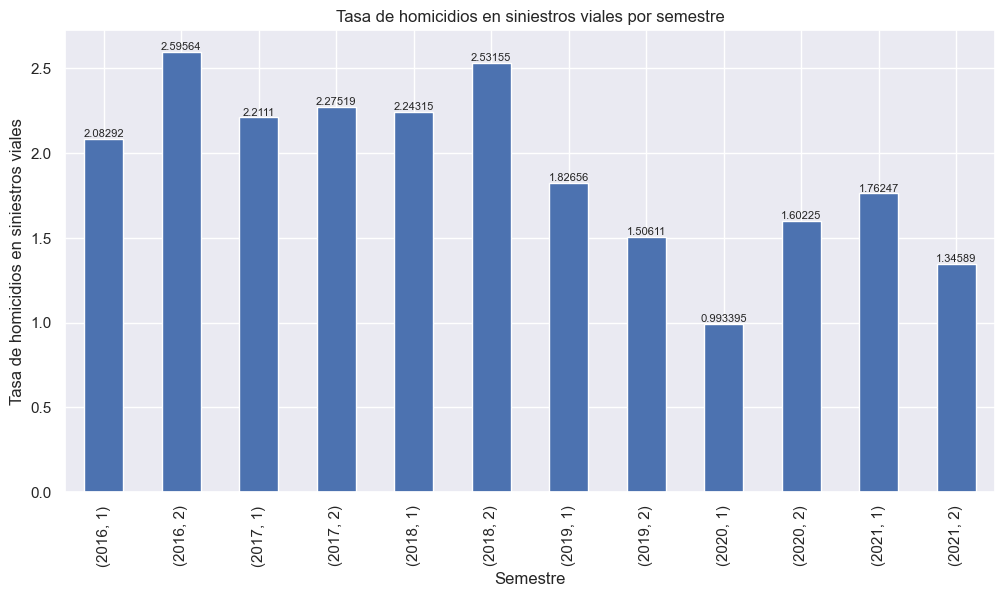

In [22]:
ax = tasa_homicidios.plot(kind='bar', figsize=(12, 6))
ax.bar_label(ax.containers[0], fontsize=8)
plt.xlabel('Semestre')
plt.ylabel('Tasa de homicidios en siniestros viales')
plt.title('Tasa de homicidios en siniestros viales por semestre')
plt.show()

- Creamos un DataFrame que nos permita analizar el cambio porcentual en la tasa de homicidios entre semestres previos:


In [23]:
# Calculamos la tasa de homicidios por semestre
kpi_1_df['tasa_homicidios'] = kpi_1_df['homicidios'] / poblacion_total * 100000

# Calculamos los homicidios y la tasa del semestre anterior
kpi_1_df['semestre_anterior'] = kpi_1_df['homicidios'].shift()
kpi_1_df['tasa_semestre_anterior'] = kpi_1_df['tasa_homicidios'].shift()

# Calculamos la variación porcentual
kpi_1_df['variacion'] = (kpi_1_df['tasa_homicidios'] -
                         kpi_1_df['tasa_semestre_anterior']) / kpi_1_df['tasa_semestre_anterior'] * 100
kpi_1_df.fillna(0, inplace=True)
kpi_1_df

homicidios  tasa_homicidios  semestre_anterior  \
año  semestre                                                   
2016 1                 65         2.082925                0.0   
     2                 81         2.595645               65.0   
2017 1                 69         2.211105               81.0   
     2                 71         2.275195               69.0   
2018 1                 70         2.243150               71.0   
     2                 79         2.531555               70.0   
2019 1                 57         1.826565               79.0   
     2                 47         1.506115               57.0   
2020 1                 31         0.993395               47.0   
     2                 50         1.602250               31.0   
2021 1                 55         1.762475               50.0   
     2                 42         1.345890               55.0   

               tasa_semestre_anterior  variacion  
año  semestre                                     
2016 1                       0.000000   0.000000  
     2                       2.082925  24.615385  
2017 1                       2.595645 -14.814815  
     2                       2.211105   2.898551  
2018 1                       2.275195  -1.408451  
     2                       2.243150  12.857143  
2019 1                       2.531555 -27.848101  
     2                       1.826565 -17.543860  
2020 1                       1.506115 -34.042553  
     2                       0.993395  61.290323  
2021 1                       1.602250  10.000000  
     2                       1.762475 -23.636364

- Graficamos el cambio porcentual de la tasa de homicidios en siniestros viales por semestre.


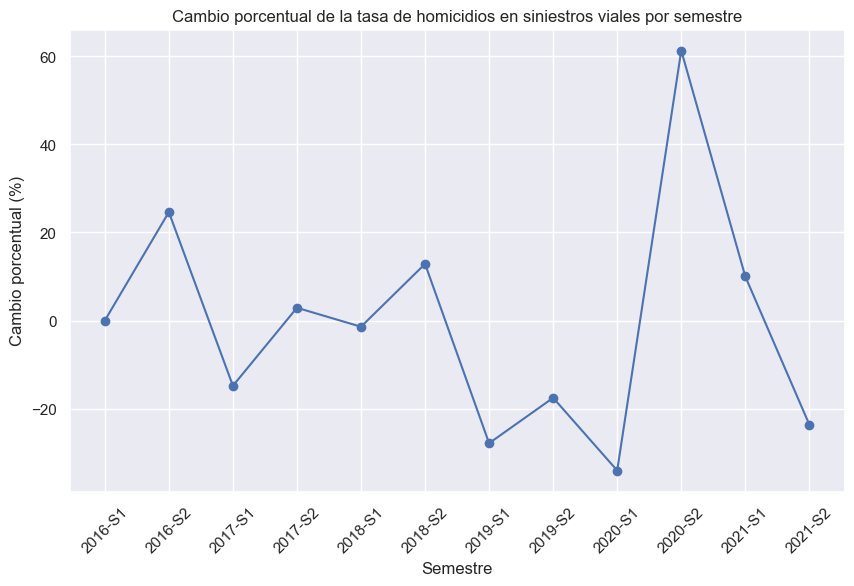

In [24]:
# Creamos una nueva columna 'año_semestre' para el eje x del gráfico
kpi_1_df['año_semestre'] = kpi_1_df.index.get_level_values('año').astype(
    str) + '-S' + kpi_1_df.index.get_level_values('semestre').astype(str)

# Creamos el gráfico
plt.figure(figsize=(10, 6))
plt.plot(kpi_1_df['año_semestre'], kpi_1_df['variacion'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Semestre')
plt.ylabel('Cambio porcentual (%)')
plt.title(
    'Cambio porcentual de la tasa de homicidios en siniestros viales por semestre')
plt.grid(True)
plt.show()

Podemos observar varias tendencias y cambios en la tasa de homicidios en siniestros viales a lo largo de los semestres:

1. A lo largo de los semestres, se observa una tendencia general a la baja en la tasa de homicidios en siniestros viales, aunque hay semestres con aumentos respecto al semestre anterior. El semestre **1** del **2020** muestra la mayor baja, probablemente debido a la menor circulación de autos por las restricciones de la pandemia de Coronavirus.

2. En el último semestre analizado (segundo semestre de 2021), se logró una reducción del **23%** en la tasa de homicidios en comparación con el semestre anterior, superando con creces el objetivo del KPI de una reducción del **10%**. Esto indica que las medidas implementadas durante este período fueron efectivas.

3. Para el primer semestre de 2021, la tasa de homicidios en siniestros viales fue de **1.76**, lo que significa que hubo aproximadamente **1.76** homicidios en accidentes de tránsito por cada 100,000 habitantes. El objetivo era reducir esta tasa a **1.60** para el segundo semestre de **2021**. Al calcular el KPI para este período, se obtuvo una tasa de **1.35**, lo que indica que se cumplió con el objetivo propuesto.

4. En resumen, aunque la curva no es estacionaria y muestra fluctuaciones semestrales, la tendencia general es a la baja, lo que es un indicativo positivo. Sin embargo, es importante seguir monitoreando estos datos y ajustando las medidas de seguridad vial según sea necesario para mantener esta tendencia a la baja.

Estos datos subrayan la importancia de seguir implementando y mejorando las medidas de seguridad para reducir la tasa de homicidios en siniestros viales. También destacan cómo factores externos, como una pandemia, pueden tener un impacto significativo en las tasas de homicidios en siniestros viales.


### 3.2 KPI 2


- _Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior_.

  Definimos a la **cantidad de accidentes mortales de motociclistas en siniestros viales** como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal.
  Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es:

  $\text{Cantidad de accidentes mortales de motociclistas} = -\frac{\text{Víctimas moto año anterior - Víctimas moto año actual}}{\text{Víctimas moto año anterior}}\times 100$

  Donde:

  - $\text{Víctimas moto año anterior}$: Número de accidentes mortales con víctimas en moto en el año anterior
  - $\text{Víctimas moto año actual}$: Número de accidentes mortales con víctimas en moto en el año actual


In [25]:
# Filtramos los datos para obtener solo los accidentes mortales de motociclistas
df_moto = df[df['victima'] == 'MOTO']

# Obtener el año de cada accidente
df_moto['año'] = df_moto['fecha_hora'].dt.year

# Calculamos el número de accidentes por año
accidentes_por_año = df_moto['año'].value_counts().sort_index()
accidentes_por_año.to_frame(name='accidentes')

,accidentes
año,
2016,65
2017,56
2018,57
2019,50
2020,28
2021,46


In [27]:
# Calculamos el cambio porcentual para el periodo 2020-2021
kpi = round(
    (accidentes_por_año.iloc[-2] - accidentes_por_año.iloc[-1]) / accidentes_por_año.iloc[-2] * 100, 2)
print(f'El cambio porcentual del periodo 2020-2021 es: {kpi}%')

El cambio porcentual del periodo 2020-2021 es: -64.29%


- Sustituyendo los valores correspondientes obtenemos:

$$\text{Cambio porcentual} = \frac{28 - 46}{28} \times 100 \approx -64.29\%$$


Podemos observar, que la cantidades de accidentes mortales de motociclistas aumentaron de 28 en 2020 a 46 en 2021, lo que quiere decir que no se logró la reducción del 7% en accidentes mortales de motociclistas. De hecho, hubo un aumento del 64.29% en accidentes mortales de motociclistas de 2020 a 2021.


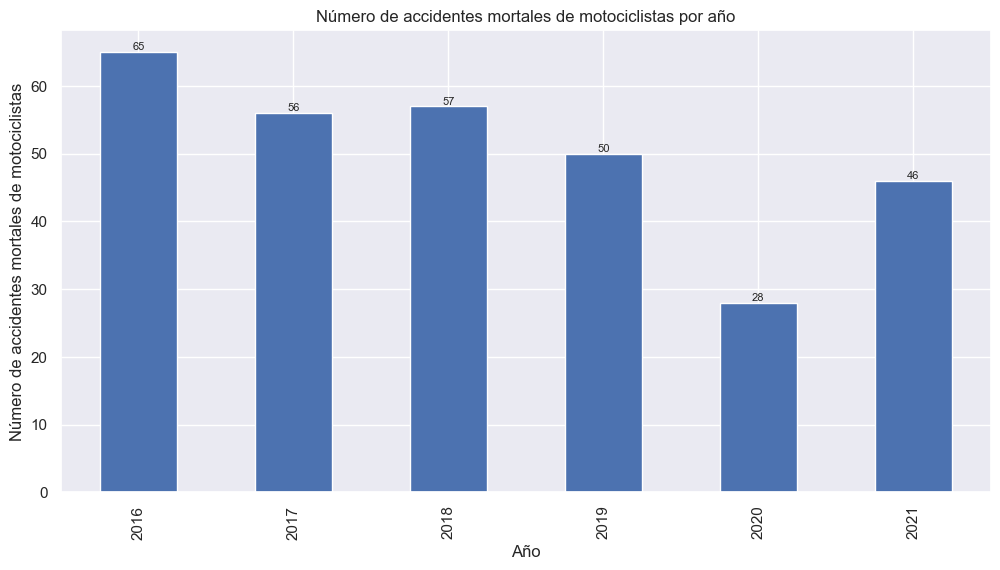

In [30]:
# Graficamos el número de accidentes por año
ax = accidentes_por_año.plot(kind='bar', figsize=(12, 6))

ax.bar_label(ax.containers[0], fontsize=8)
plt.xlabel('Año')
plt.ylabel('Número de accidentes mortales de motociclistas')
plt.title('Número de accidentes mortales de motociclistas por año')
plt.show()

- Creamos un DataFrame que nos permita analizar el cambio porcentual Cambio porcentual de los accidentes mortales de motociclistas en años previos:


In [31]:
# Creamos un DataFrame con los accidentes por año
kpi_2_df = pd.DataFrame({
    'año': accidentes_por_año.index,
    'accidentes': accidentes_por_año.values
})

# Nos aseguramos de que los años están en orden
kpi_2_df.sort_values('año', inplace=True)

# Calculamos los accidentes del año anterior
kpi_2_df['año_anterior'] = kpi_2_df['accidentes'].shift()

# Calculamos la variación porcentual
kpi_2_df['variacion'] = (kpi_2_df['accidentes'] -
                         kpi_2_df['año_anterior']) / kpi_2_df['año_anterior'] * 100
kpi_2_df.fillna(0, inplace=True)
kpi_2_df

,año,accidentes,año_anterior,variacion
0,2016,65,0.0,0.000000
1,2017,56,65.0,-13.846154
2,2018,57,56.0,1.785714
3,2019,50,57.0,-12.280702
4,2020,28,50.0,-44.000000
5,2021,46,28.0,64.285714


- Graficamos el cambio porcentual de los accidentes mortales de motociclistas por año.


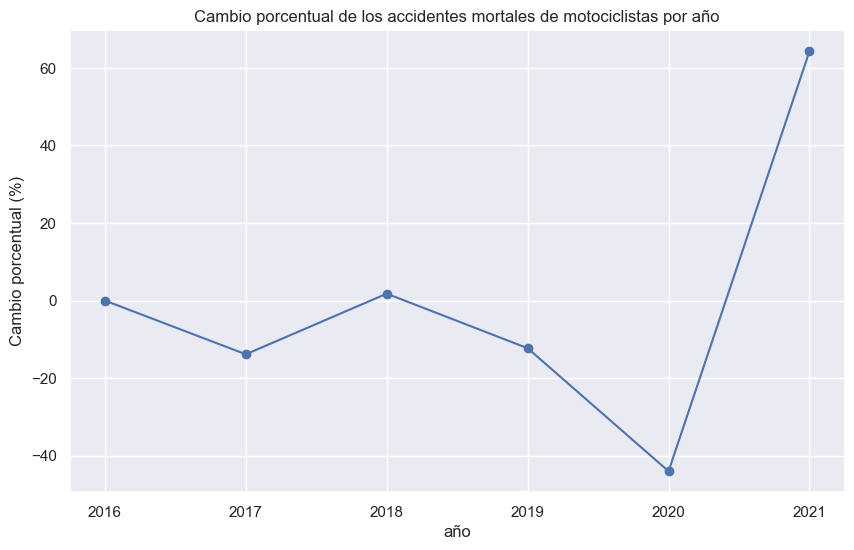

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(kpi_2_df['año'], kpi_2_df['variacion'], marker='o')
plt.xlabel('año')
plt.ylabel('Cambio porcentual (%)')
plt.title('Cambio porcentual de los accidentes mortales de motociclistas por año')
plt.grid(True)
plt.show()

A partir de los datos analizados, podemos observar varias tendencias y cambios en el número de accidentes mortales de motociclistas a lo largo de los años:

1. En **2017**, los accidentes mortales de motociclistas **disminuyeron en un 13.85%** en comparación con el año anterior. Esto podría ser un indicativo de que las estrategias de seguridad vial implementadas en ese año tuvieron un impacto positivo.

2. En **2018**, hubo un **aumento del 1.79%** en comparación con 2017. Aunque es un aumento, la tasa de cambio es relativamente pequeña, lo que podría indicar que la situación se mantuvo relativamente estable.

3. En **2019**, hubo una **disminución del 12.28%** en comparación con 2018. Esto es una buena señal y podría indicar que las medidas de seguridad implementadas ese año fueron efectivas.

4. En **2020**, hubo una **disminución significativa del 44%** en comparación con 2019. Este es un cambio notable y podría estar relacionado con factores excepcionales como la pandemia de COVID-19, que pudo haber reducido la cantidad de tráfico y, por lo tanto, el número de accidentes.

5. En **2021**, hubo un **aumento significativo del 64.29%** en comparación con 2020. Este es un cambio preocupante y sugiere que se deben tomar medidas para abordar este aumento.

Estes análisis subraya la importancia de seguir implementando y mejorando las medidas de seguridad para los motociclistas. También destacan cómo factores externos, como una pandemia, pueden tener un impacto significativo en las tasas de accidentes.


## 4 Referencias


- Nacion, L. (2023, 1 febrero). Cuántos habitantes hay en la ciudad de Buenos Aires, según el Censo 2022. LA NACION. https://www.lanacion.com.ar/sociedad/cuantos-habitantes-hay-en-la-ciudad-de-buenos-aires-segun-el-censo-2022-nid01022023/

- Buenos Aires Population 2023. (s. f.). https://worldpopulationreview.com/world-cities/buenos-aires-population

- INDEC, Instituto Nacional de Estadistica y Censos de la REPUBLICA ARGENTINA. (s. f.). INDEC: Instituto Nacional de Estadística y Censos de la República Argentina. https://www.indec.gob.ar/ftp/cuadros/poblacion/cnphv2022_resultados_provisionales.pdf
